# Welcome to Day 1 coding tutorial.

Goals for today:
- learn how to effectively work in Google colab and set up developer environment
- become familiar with common deep learning frameworks and tools in python and what they may offer
- get familiar with HuggingFace ecosystem and its transformers library (a home for LLMs)
- go through an example how to apply pretrained LLM for real-world dataset to solve specific problem
- Get hands dirty with Transformers! Solve several coding problems.

# 1 Google colab essentials and important details

* Google Colab is a platform where you can write and execute python code. It looks very similar to Jupyter Notebooks.
* Google Colab developer environment has some pre-installed libraries (e.g. Pytorch and tensorflow). It also allows to install any other required libraries (you will see it below)
* It is possible to mount your google drive and load any data from there into the notebook. If you want to work with your own data later, this is the way to go.
* It is possible to share Notebooks with other participants. Top right corner.
* Do not forget to save your work (top left -> file -> save). While Google saves it automatically, a manual save would be useful to avoid possible issues with autosaving.

# The format of seminars

* Each day we will go through several (2-3) notebooks.
* Some of them have coding assignments where you are expected to write some code and test it on some input texts.
* Some other notebooks (like this one) are demonstrations only and do not require writing code but they may require reading some documentary and answering some follow up questions by yourself.
* Sometimes we will do a live coding. You will be presented some tasks and together we will try to wite some code, debug it and solve the task.


# Other important details

* There is no grades for assignments. Don't be afraid to make mistakes and it is ok if you struggle to solve something. Feel free to ask for help and explanations.  You are welcome! :)
* Feel free to ask questions anytime during and after seminars. We have enough time to stop on some part and discuss it in more details.
* We are going to discuss assignments and working code will be provided to you afterwords.
* Sometimes during the seminar we will have discussioms (e.g. discussing follow ups or some other details) - you are very welcome to speak and participate in discussions!

## 1.1. How to install additional libraries

Use pip package manager to install desired libraries. A good software engineering practice is to pin specific version of a library you use in order to make your code is reproducible.

If you are curious what library version to use, you can find actual versions (latest, stable, dev etc) on pypi (Python Package Index) https://pypi.org/

E.g. if we are interested in trasnformers library (which we are going to use a lot), we can go to its pypi page and look on available versions.
https://pypi.org/project/transformers/


In [ ]:
!pip install transformers==4.24.0
!pip install Pillow==10.0.0
!pip install -U sentence-transformers==2.2.2
!pip install datasets==2.14.4
!pip install sentencepiece==0.1.99

In [ ]:
from PIL import Image  # will be used to display supplementary images for the seminars

## 1.2 [Optional] How to mount your Google drive

Run the cell below, it will ask you to give a permission to connect to your google drive, allow it (if you wish). Once you do it, you will be able to browse and load content of your drive in your notebook.






In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# pwd command shows directory where we are right now. As you can see our notebook is created in the directory "content"

!pwd

/content


In [ ]:
# Navigate folder structure and write a path to your data

DATA_PATH = "drive/MyDrive/my_file.csv"  # Put yur desired file path here

# my_data = pd.read_csv(DATA_PATH)

# 2. Overview of common deep learning frameworks and tools

## 2.1 Most popular frameworks:
- Pytorch
- tensorflow
- keras
- Jax
- others

Each of them has its own advantages and disadvantages. During this workshop we are going to use Pytorch. This choice is justified by the fact that Pytorch is very flexible for fast prototyping yet very powerful.

All of the libs above heavily rely on GPU acceleration.
Read more engineering details:
https://developer.nvidia.com/deep-learning-frameworks


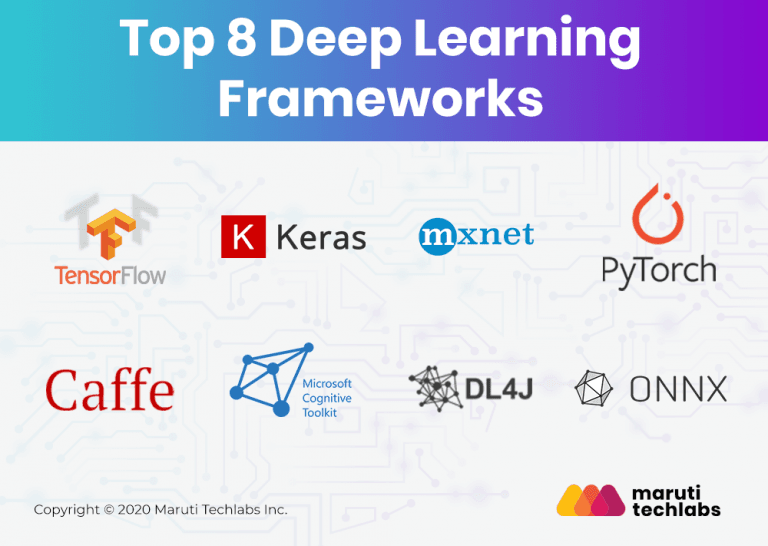

In [ ]:
Image.open("/content/drive/MyDrive/oxford_llms_practice/day_1/images/dl_frameworks.png")

## 2.2 Hugging Face - an ecosystem for deep learning

Serves as:
* models registry (most of the state of the art models are being added to Hugging Face model reigstry). You can download and use any of > 250k models available.
* transformers - a library on top of pytorch/tensofrlow/JAX that allows to train and apply deep learning models for your problems.
* Datasets (use available labelled datasets to train/evaluate your models. See what datasets were used to train/fine-tune other available models)
* Open LLM Leaderboard: https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard
* many-many more stuff.

Read more about things you are interested in the HF docs https://huggingface.co/docs

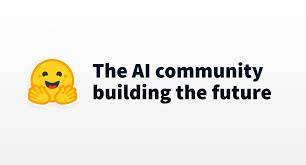

In [ ]:
Image.open("/content/drive/MyDrive/oxford_llms_practice/day_1/images/hf_logo.jpeg")

Import libraries we are going to use

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from scipy.special import softmax

# 3. Models overview

Transformers models are usually built as encoder-only, decoder only or encoder-decoder. During this intro we will look up all of these models, but day 1 will be mostly about encoder only models, while decoder-only will be presented in depth in day 3.

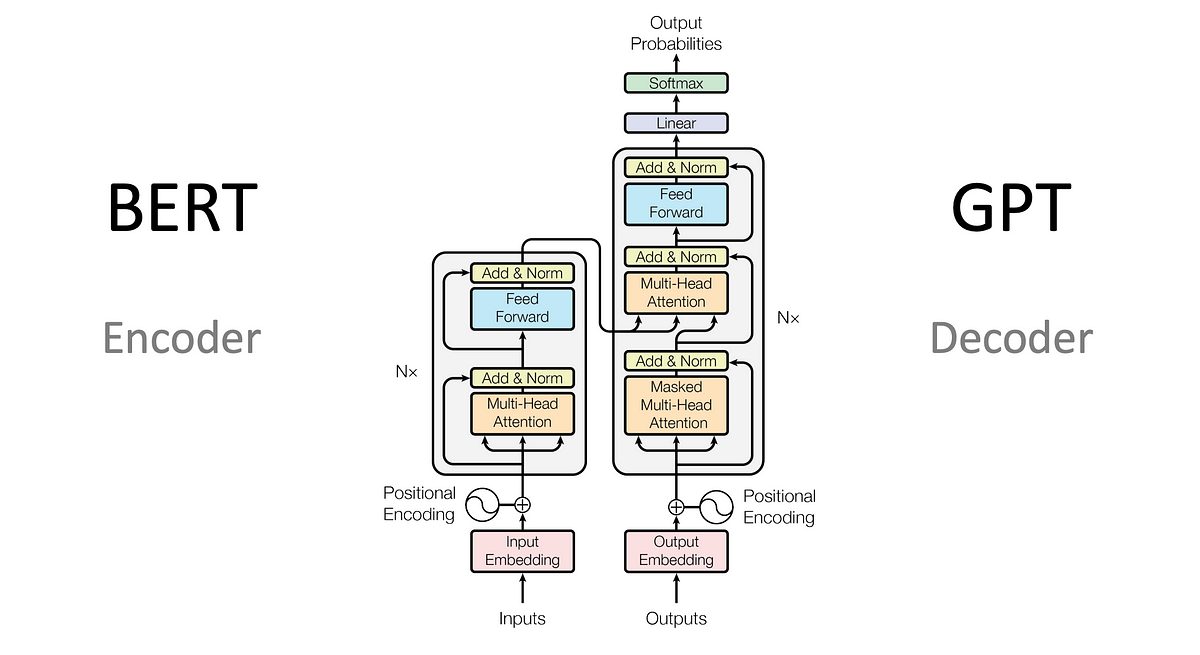

In [ ]:
Image.open(
    "/content/drive/MyDrive/oxford_llms_practice/day_1/images/encoder_decoder.png"
)

# 3.1 Encoder only models

good in representing texts. There is a lot of tasks when you should prefer using encoder only models. We will go through some of them.

### 3.1.1 Sentiment analysis

Classify what sentiment does a text has? Positive, negative? Something else?

In [ ]:
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

model = transformers.AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
config = transformers.AutoConfig.from_pretrained(
    model_name
)  # read more about configs https://huggingface.co/docs/transformers/main_classes/configuration

In [ ]:
sample = "I like learning stuff about neural networks!"

encoded_input = tokenizer(sample, return_tensors="pt")
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

 Scores is an array of probabilities. Each probability belongs to one of available sentiments. Notice that all these probabilities sum up to 1.

In [ ]:
scores

array([0.0196515 , 0.15005884, 0.83028966], dtype=float32)

We can use model config to map predicted probabilities to actual class names

In [ ]:
config.id2label[0], config.id2label[1], config.id2label[2]

('negative', 'neutral', 'positive')

### 3.1.2 Sentence Similarity

is a task to identify how similar are 2 entities. One of the common applications is a semantic search.


In [ ]:
model_name = "sentence-transformers/all-MiniLM-L6-v2"

In [ ]:
from sentence_transformers import SentenceTransformer

sample_sentence = ["I am happy with this purchase"]

dissimilar_sample = ["My friend will come soon"]

similar_sample = ["I like what I bought"]

model = SentenceTransformer(model_name)

We will use cosine similarity metric that is able to take as input 2 arrays and output a single value that represents a measure of similarity between 2 arrays. The greater the value the more similar 2 samples are and vice versa. We will use implementaton of cosine similarity from ```sklearn``` library.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

Similarity between 2 same texts is equal to 1 and this is the perfect similairty.

In [ ]:
cosine_similarity(model.encode(sample_sentence), model.encode(sample_sentence))

array([[1.]], dtype=float32)

Similarity between our sample and a dissimilar sample is much less and is close to zero.

In [ ]:
cosine_similarity(model.encode(sample_sentence), model.encode(dissimilar_sample))

array([[0.14736044]], dtype=float32)

Similarity between our sample and somehow similar (rephrased) sample is much higher in compare with a dissimilar sample.

In [ ]:
cosine_similarity(model.encode(sample_sentence), model.encode(similar_sample))

array([[0.623648]], dtype=float32)

### 3.1.3 What other tasks may be solved with encoder only models?

* Question answering (e.g. multiple choice)
* Named Entity Recognition (NER), Part of speech tagging (POS)
* Topic modelling
* A lot more

## 3.2 Encoder-Decoder

Encoder stage is required to create meaningful input text representation and decoder state refers to encoded input in order to generate meaningful output. Examples of tasks where encoder-decoder models work good: machine translation, summarization.

### 3.2.1 Summarisation

A task to summarise given text with its key takeaways

In [ ]:
# This is a dialogue, we will ask a model to summarise its meaning

example = """
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye
"""

In [ ]:
def process_example(model_name: str, sample_text: str):
    """
    loads model, tokenises text, applies model to get text completion
    and prints model output
    """
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    input_ids = tokenizer(sample_text, return_tensors="pt").input_ids
    outputs = model.generate(input_ids)
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print("#" * 100)
    print("original text: \n")
    print(sample_text)
    print("#" * 100)
    print(f"Generated by {model_name}: \n")
    print(decoded_output)
    print("#" * 100)

In [ ]:
model_name = "facebook/bart-large"

In [ ]:
process_example(model_name, example)

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


####################################################################################################
original text: 


Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

####################################################################################################
Generated by facebook/bart-large: 

�Hannah: Hey, do you have Betty's number?�Amanda:
####################################################################################################


As you can see the summaries above look not perfect, later we will learn how to improve them.

### 3.2.2 Machine translation

Let's use same flan-t5 model to see that it is also capable to translate task. Pay attention that we add an instruction to translate from English to German in the beginning of the actual sentence.

In [ ]:
model_name = "google/flan-t5-base"

example = "Translate from English to German: how are you today?"

process_example(model_name, example)

####################################################################################################
original text: 

Translate from English to German: how are you today?
####################################################################################################
Generated by google/flan-t5-base: 

wie sind Sie heute?
####################################################################################################


## 3.3 Decoder Only models

This class of models doesnt have an encoder and only utilises decoder to generate text. Modern models like GPT (e.g. ChatGPT) are decoder only models.

While it is more clear when one needs encoder only model, the choice between  encoder-decoder or decoder only is more complicated. Encoder-decoder models are good at tasks like summarisation or translation where input context is very important and generated output should rely on input very much. However decoder only models also show very strong capabilities in these and other tasks that require fee generated outputs.

In [ ]:
model_name = "bigscience/bloom-560m"

In [ ]:
from transformers import BloomTokenizerFast, BloomForCausalLM

tokenizer = BloomTokenizerFast.from_pretrained(model_name)
model = BloomForCausalLM.from_pretrained(model_name)


text = "Best way to spend weekends is"
encoded_input = tokenizer(text, return_tensors="pt")

In [ ]:
output = model.generate(**encoded_input)

In [ ]:
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
print(decoded_output)

Best way to spend weekends is to go to the beach. The beach is a great place to relax


## 4. Main take aways so far

- Different models fit different tasks. Learn to understand difference between models and choose them wisely
- Raw pretrained models may perform not very well on your data. We will later explore how to finetune models to improve quality.

## 5. Assignments:
- go to HuggingFace and explore models search page https://huggingface.co/models. Choose a task (e.g. sentence similarity, you can chose any you like), explore models and write down 3 models you found interesting and brief description of them (e.g. data domain they were trained on, number of parameters, instructions to use).

The idea of this exercise is to become comfortable with HuggingFace models space. You will need to refer to it a lot later.